Fashion MNIST

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
pwd

'/media/aaron/G/projects/ML'

In [10]:
fashion_train_df=pd.read_csv('/media/aaron/528649A186498707/Users/Aaron Kahn/Downloads/fashionmnist/fashion-mnist_train.csv',sep=',')

In [11]:
fashion_test_df=pd.read_csv('/media/aaron/528649A186498707/Users/Aaron Kahn/Downloads/fashionmnist/fashion-mnist_test.csv',sep=',')

In [12]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [16]:
fashion_test_df.shape

(10000, 785)

In [17]:
fashion_train_df.shape

(60000, 785)

In [18]:
training=np.array(fashion_train_df, dtype='float32')

In [19]:
testing=np.array(fashion_test_df, dtype='float32')

In [20]:
plt.imshow(training[9,1:].reshape(28,28))


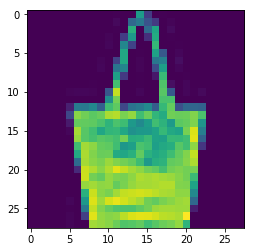

In [21]:
plt.show()

In [22]:
M_grid=15
L_grid=15

fig,axes=plt.subplots(L_grid,M_grid,figsize=(17,17))
axes=axes.ravel() #falten a 15 * 15 matrix into 225 array
n_training=len(training)
for i in np.arange(M_grid*L_grid):
    index=np.random.randint(0,n_training)
    axes[i].imshow(training[index,1:].reshape(28,28))
    axes[i].set_title(training[index,0],fontsize=8)
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

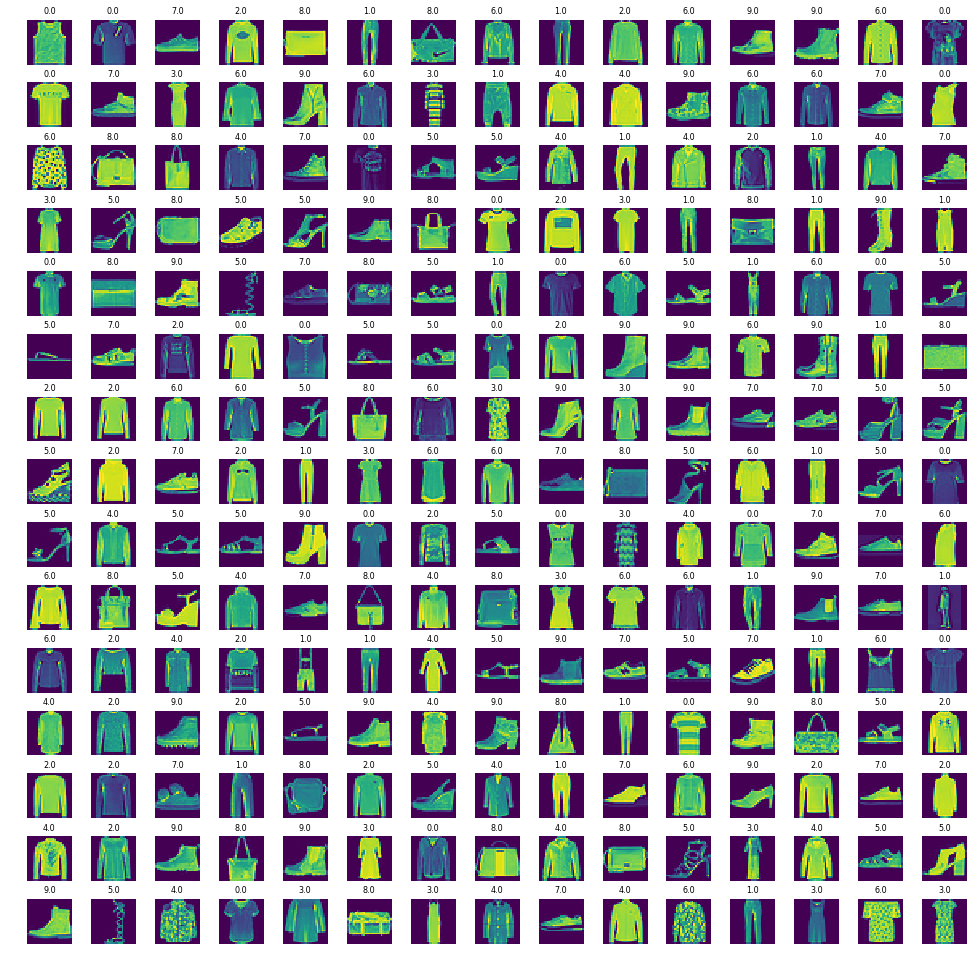

In [23]:
plt.show()

In [24]:
x_train=training[:,1:]/255
y_train=training[:,0]

In [25]:
x_test=testing[:,1:]/255
y_test=testing[:,0]


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_validate,y_train,y_validate=train_test_split(x_train,y_train,test_size=0.2,random_state=12345)

In [28]:
x_train=x_train.reshape(x_train.shape[0],*(28,28,1))
x_test=x_test.reshape(x_test.shape[0],*(28,28,1))
x_validate=x_validate.reshape(x_validate.shape[0],*(28,28,1))

In [29]:
x_train.shape

(48000, 28, 28, 1)

In [30]:
x_test.shape

(10000, 28, 28, 1)

In [31]:
x_validate.shape

(12000, 28, 28, 1)

In [32]:
import keras

/home/aaron/.local/share/canopy/edm/envs/User/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [33]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [34]:
cnn_model=Sequential()

In [35]:
cnn_model.add(Conv2D(32,3,3,input_shape=(28,28,1), activation='relu'))

/home/aaron/.local/share/canopy/edm/envs/User/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """Entry point for launching an IPython kernel.


In [36]:
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

In [37]:
cnn_model.add(Flatten())

In [38]:
cnn_model.add(Dense(output_dim=32, activation='relu'))

/home/aaron/.local/share/canopy/edm/envs/User/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  """Entry point for launching an IPython kernel.


In [39]:
cnn_model.add(Dense(output_dim=10, activation='sigmoid'))

/home/aaron/.local/share/canopy/edm/envs/User/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  """Entry point for launching an IPython kernel.


In [40]:
cnn_model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [41]:
epochs=50

In [42]:
cnn_model.fit(x_train,y_train,batch_size=512,nb_epoch=epochs,verbose=1,validation_data=(x_validate,y_validate))

/home/aaron/.local/share/canopy/edm/envs/User/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 46s 951us/step - loss: 0.8772 - acc: 0.6986 - val_loss: 0.5033 - val_acc: 0.8225

In [43]:
evaluation=cnn_model.evaluate(x_test,y_test)
print('Test Accuracy: {: .3f}'.format(evaluation[1]))

10000/10000 [==============================] - 49s 5ms/step

In [44]:
predicted_classes=cnn_model.predict_classes(x_test)

In [45]:
predicted_classes

array([0, 1, 6, ..., 8, 8, 1])

In [46]:
M_grid=5
L_grid=5

fig,axes=plt.subplots(L_grid,M_grid,figsize=(12,12))
axes=axes.ravel() #falten a 15 * 15 matrix into 225 array
n_training=len(training)
for i in np.arange(0,M_grid*L_grid):
    axes[i].imshow(x_test[i].reshape(28,28))
    axes[i].set_title("Prediction Class={:0.1f}\n True Class = {:0.1f}".format(predicted_classes[i],y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

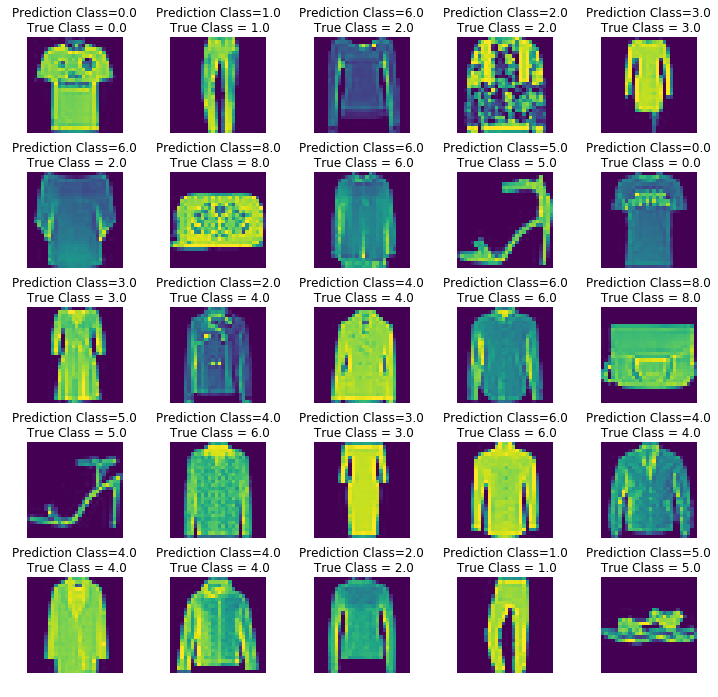

In [47]:
plt.show()